In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1.	Firstly, replace all Missing values with relevant figures.

data = pd.read_csv('Dataset_Day9.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [3]:
columns_to_check = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
data[columns_to_check] = data[columns_to_check].replace(0,float('NaN'))

data.isna().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [4]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [5]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#2.	Then remove all existing outliers and get the final data for classification.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [11]:
# 3.	Split the data into 75% training and 25% testing data. Then, use a SVM classifier algorithm with target variable as ‘Outcome’.


# c.	Plot a curve on Precision & Recall & F1-Score vs appropriate range of C using the best kernel type you obtained in question(3b), (All metrics on the same graph). Find the C for which F1-score is the highest for the given kernel type.


X = data.drop('Outcome',axis=1)
Y = data['Outcome']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1234)
len(X_train),len(X_test)


(513, 172)

In [12]:
# a.	Print the default model performance metrics: Accuracy, Precision, Recall, F1Score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn import svm

kernel_values =['linear', 'poly', 'rbf', 'sigmoid']


svm_clf = svm.SVC(kernel=kernel_values[0], C = 1, gamma =0.1)

svm_clf = svm_clf.fit(X_train,y_train)

y_pred = svm_clf.predict(X_test)

print("Model Performance metrics are as below :-\n")
print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))
print("F1-Score is "+str(f1_score(y_test,y_pred)))

Model Performance metrics are as below :-

Accuracy is 0.8081395348837209
Precision is 0.5909090909090909
Recall is 0.6341463414634146
F1-Score is 0.611764705882353


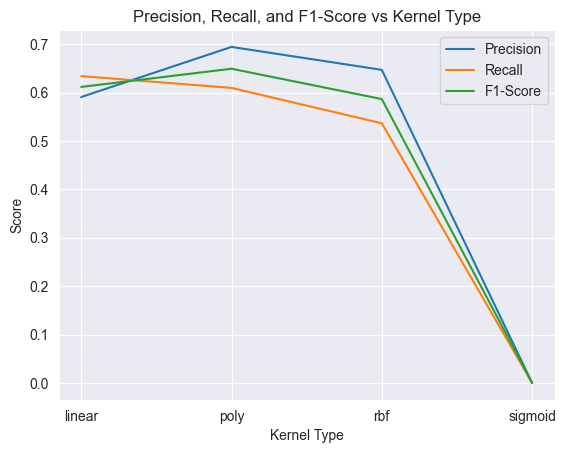

Best kernel type for highest F1-score: poly


In [19]:
# b.	Plot a Precision & Recall & F1-Score vs kernel type('linear', 'poly', 'rbf', 'sigmoid', 'precomputed') curve (All metrics on the same graph). Find the kernel type for which F1-score is the highest.

from sklearn.svm import SVC

kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

precision_scores = []
recall_scores = []
f1_scores = []

for kernel in kernel_types:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot Precision, Recall, and F1-Score vs kernel type curve
plt.plot(kernel_types, precision_scores, label='Precision')
plt.plot(kernel_types, recall_scores, label='Recall')
plt.plot(kernel_types, f1_scores, label='F1-Score')
plt.xlabel('Kernel Type')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs Kernel Type')
plt.legend()
plt.show()

# Find the kernel type for the highest F1-score
max_f1_index = np.argmax(f1_scores)
best_kernel_type = kernel_types[max_f1_index]
print("Best kernel type for highest F1-score:", best_kernel_type)


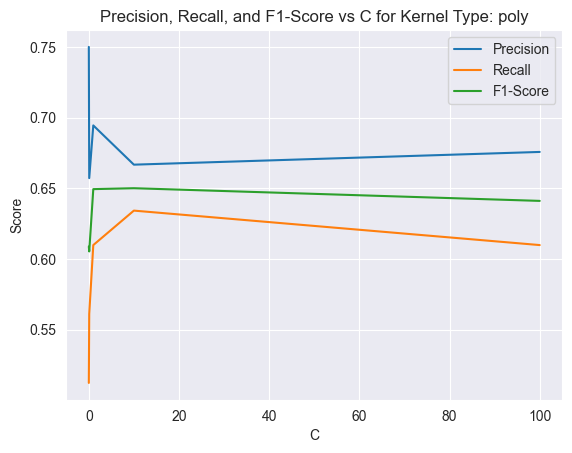

Best C for highest F1-score with kernel type poly : 10


In [20]:
# c.	Plot a curve on Precision & Recall & F1-Score vs appropriate range of C using the best kernel type you obtained in question(3b), (All metrics on the same graph). Find the C for which F1-score is the highest for the given kernel type.

C_values = [0.01, 0.1, 1, 10, 100]

precision_scores = []
recall_scores = []
f1_scores = []

for C in C_values:
    svm = SVC(kernel=best_kernel_type, C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot Precision, Recall, and F1-Score vs C curve
plt.plot(C_values, precision_scores, label='Precision')
plt.plot(C_values, recall_scores, label='Recall')
plt.plot(C_values, f1_scores, label='F1-Score')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs C for Kernel Type: ' + best_kernel_type)
plt.legend()
plt.show()

# Find the C value for the highest F1-score
max_f1_index = np.argmax(f1_scores)
best_C = C_values[max_f1_index]
print("Best C for highest F1-score with kernel type", best_kernel_type, ":", best_C)
